# Tourist Destination Recommendation
We are building this project where we are predicting travel locations based on past travel destinations. We have two methods:  
1. Input one location and get five travel recommendations.  
2. Input three locations _(based on past travel history)_ and get five travel recommendations.  

## Importing Dataset
Here we import dataset into colab using our google drive. Dataset will be provided separately in other folder. To run this project dataset has to be in google drive.

In [53]:
from google.colab import drive

# Mounting drive with project file
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, we need to locate the dataset in drive and provide the location of dataset. we use `pandas` libaray to read our dataset.

In [54]:
import pandas as pd

# Reading Dataset by pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tourist desinations dataset.csv', encoding = 'latin1')

Here we are importing important libraries which we will need in next steps.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataset Exploration
This step involves understanding and clearing dataset. We try finding relation between different features.

### Undersatnding Structure

In [56]:
# Display the first five rows of the dataset to know about representation of data
df.head()

,Destination,Location,Description,Fun Activities,Activity Description,Notable Season,User Rating
0,Adelaide,Australia,"Adelaide, known as the ""City of Churches,"" off...","Adelaide Hills, Barossa Valley Wine Tours, Ade...","Explore the picturesque Adelaide Hills, go on ...",Autumn and Spring,4.5
1,Agra,India,"Home to the iconic Taj Mahal, Agra is a city s...","Taj Mahal Visit, Agra Fort Exploration, Fatehp...","Explore the magnificent Taj Mahal, delve into ...",Winter,4.1
2,Amalfi Coast,Italy,The Amalfi Coast is a stunning coastal region ...,"Hiking, Boat Tours, Lemon Grove Visits, Sunbat...",Embark on breathtaking coastal hikes with pano...,Summer,3.9
3,Amazon Rainforest,Brazil,"The Amazon Rainforest, the world's largest tro...","Wildlife Watching, Canoeing, Jungle Trekking, ...",Witness diverse wildlife in its natural habita...,Rainy,4.4
4,Amritsar,India,"Famous for the Golden Temple, Amritsar is a sp...","Golden Temple Visit, Wagah Border Ceremony, Fo...","Pay a visit to the iconic Golden Temple, witne...",Winter,4.8


In [57]:
# Get information about the contents of features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           207 non-null    object 
 1   Location              207 non-null    object 
 2   Description           207 non-null    object 
 3   Fun Activities        207 non-null    object 
 4   Activity Description  207 non-null    object 
 5   Notable Season        207 non-null    object 
 6   User Rating           207 non-null    float64
dtypes: float64(1), object(6)
memory usage: 11.4+ KB


In [58]:
# Check the dimensions of the dataset
print('The rows and columns in dataset (rows, column) - ', df.shape)

The rows and columns in dataset (rows, column) -  (207, 7)


### Statistical Description

In [59]:
# Understanding statistical values in numeric columns.
df.describe()

,User Rating
count,207.000000
mean,4.169082
std,0.398554
min,3.100000
25%,3.850000
50%,4.200000
75%,4.500000
max,4.800000


### Missing data


In [60]:
# Check for missing data in dataset
df.isnull().sum()

Destination             0
Location                0
Description             0
Fun Activities          0
Activity Description    0
Notable Season          0
User Rating             0
dtype: int64

There are NO **null values** or **missing data** in the dataset. So, we directly proceed to next step.

## Dataset Visualization
We use different types of graphs to represent our dataset and learn more about relationship between different features.

### Scatter Plot

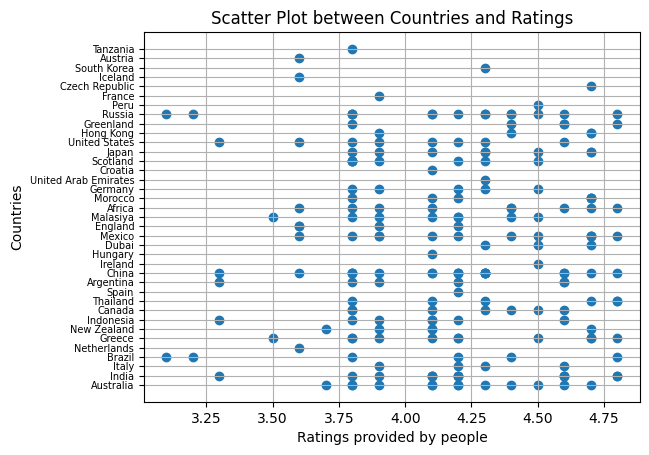

In [61]:
# Scatter plot of two variables
plt.scatter( df['User Rating'], df['Location'])
plt.xlabel('Ratings provided by people')
plt.ylabel('Countries')
plt.title('Scatter Plot between Countries and Ratings')
plt.tick_params(axis='y', labelsize = 7)
plt.grid()
plt.show()

### Histograms

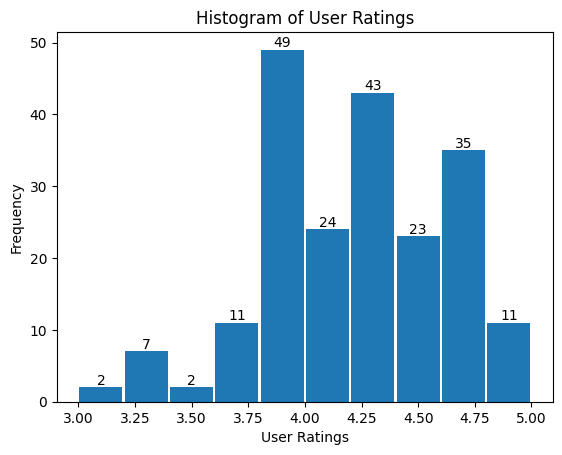

In [62]:
counts, edges, bar = plt.hist(df['User Rating'], bins = [3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5], rwidth = 0.95)
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of User Ratings')
plt.bar_label(bar)
plt.show()

In [63]:
from collections import Counter
cd = Counter(df['Location'])
loc = list(cd.keys())
cou = list(cd.values())

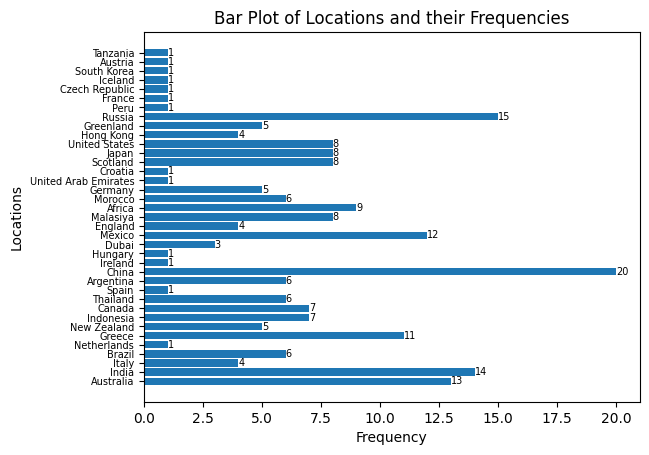

In [64]:
bar = plt.barh(loc, cou)
plt.xlabel('Frequency')
plt.ylabel('Locations')
plt.title('Bar Plot of Locations and their Frequencies')
plt.tick_params(axis='y', labelsize = 7)
plt.bar_label(bar, fontsize = 7)
plt.show()

## Data Pre-Processing and Cleaning
In this step we process the data to cleaning for further operations. the steps involved in cleaning are:  
1. Reducing text to lower case.
2. Removing links, symbols, punctuations, brackets, and emojis if present.
3. Removing stop words.  
4. Performing `stemming`.

In [65]:
import re
import string
import nltk

import pandas as pd

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()


nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()

# removing the emojies
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    text = EMOJI_PATTERN.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    # stemming
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# pre processing all columns
df['Fun Activities'] = df['Fun Activities'].apply(cleaning)
df['Description'] = df['Description'].apply(cleaning)
df['Activity Description'] = df['Activity Description'].apply(cleaning)

In [67]:
df.head()

,Destination,Location,Description,Fun Activities,Activity Description,Notable Season,User Rating
0,Adelaide,Australia,adelaid citi church offer blend histor charm c...,adelaid hill barossa valley wine tour adelaid ...,explor picturesqu adelaid hill wine tour renow...,Autumn and Spring,4.5
1,Agra,India,home icon taj mahal agra citi steep mughal his...,taj mahal visit agra fort explor fatehpur sikr...,explor magnific taj mahal delv grandeur agra f...,Winter,4.1
2,Amalfi Coast,Italy,amalfi coast stun coastal region dramat cliff ...,hike boat tour lemon grove visit sunbath,embark breathtak coastal hike panoram view exp...,Summer,3.9
3,Amazon Rainforest,Brazil,amazon rainforest world largest tropic rainfor...,wildlif watch cano jungl trek birdwatch,wit divers wildlif natur habitat paddl wind ri...,Rainy,4.4
4,Amritsar,India,famou golden templ amritsar spiritu cultur hub...,golden templ visit wagah border ceremoni food ...,pay visit icon golden templ wit grandeur wagah...,Winter,4.8


## Vectorization of Data
In this step, we vectorize the data for prediction using `TF-IDF` vectorization method.  
For that, we first split data in lists of words and then combinig them in another column. We separate out that column along with destination column in different dataframe. So we have a new dataframe containing `Destination` and `tags` that we will use for vectorization.

In [68]:
# splitting data in list of words

df['Notable Season'] = df['Notable Season'].str.split('and')
df['Fun Activities'] = df['Fun Activities'].str.split(',')

df['Description'] = df['Description'].apply(lambda x: x.split())
df['Activity Description'] = df['Activity Description'].apply(lambda x: x.split())
loc = df['Location'].apply(lambda x: x.split())

In [69]:
df.head()

,Destination,Location,Description,Fun Activities,Activity Description,Notable Season,User Rating
0,Adelaide,Australia,"[adelaid, citi, church, offer, blend, histor, ...",[adelaid hill barossa valley wine tour adelaid...,"[explor, picturesqu, adelaid, hill, wine, tour...","[Autumn , Spring]",4.5
1,Agra,India,"[home, icon, taj, mahal, agra, citi, steep, mu...",[taj mahal visit agra fort explor fatehpur sik...,"[explor, magnific, taj, mahal, delv, grandeur,...",[Winter],4.1
2,Amalfi Coast,Italy,"[amalfi, coast, stun, coastal, region, dramat,...",[hike boat tour lemon grove visit sunbath],"[embark, breathtak, coastal, hike, panoram, vi...",[Summer],3.9
3,Amazon Rainforest,Brazil,"[amazon, rainforest, world, largest, tropic, r...",[wildlif watch cano jungl trek birdwatch],"[wit, divers, wildlif, natur, habitat, paddl, ...",[Rainy],4.4
4,Amritsar,India,"[famou, golden, templ, amritsar, spiritu, cult...",[golden templ visit wagah border ceremoni food...,"[pay, visit, icon, golden, templ, wit, grandeu...",[Winter],4.8


In [70]:
# combining all lists in one row and adding it in new column named tags
df['tags'] = loc + df['Description'] + df['Fun Activities'] + df['Activity Description'] + df['Notable Season']
df.head()

,Destination,Location,Description,Fun Activities,Activity Description,Notable Season,User Rating,tags
0,Adelaide,Australia,"[adelaid, citi, church, offer, blend, histor, ...",[adelaid hill barossa valley wine tour adelaid...,"[explor, picturesqu, adelaid, hill, wine, tour...","[Autumn , Spring]",4.5,"[Australia, adelaid, citi, church, offer, blen..."
1,Agra,India,"[home, icon, taj, mahal, agra, citi, steep, mu...",[taj mahal visit agra fort explor fatehpur sik...,"[explor, magnific, taj, mahal, delv, grandeur,...",[Winter],4.1,"[India, home, icon, taj, mahal, agra, citi, st..."
2,Amalfi Coast,Italy,"[amalfi, coast, stun, coastal, region, dramat,...",[hike boat tour lemon grove visit sunbath],"[embark, breathtak, coastal, hike, panoram, vi...",[Summer],3.9,"[Italy, amalfi, coast, stun, coastal, region, ..."
3,Amazon Rainforest,Brazil,"[amazon, rainforest, world, largest, tropic, r...",[wildlif watch cano jungl trek birdwatch],"[wit, divers, wildlif, natur, habitat, paddl, ...",[Rainy],4.4,"[Brazil, amazon, rainforest, world, largest, t..."
4,Amritsar,India,"[famou, golden, templ, amritsar, spiritu, cult...",[golden templ visit wagah border ceremoni food...,"[pay, visit, icon, golden, templ, wit, grandeu...",[Winter],4.8,"[India, famou, golden, templ, amritsar, spirit..."


In [71]:
# separating destinations and tags in different dataframe
data = df[['Destination', 'tags']]
data.head()

,Destination,tags
0,Adelaide,"[Australia, adelaid, citi, church, offer, blen..."
1,Agra,"[India, home, icon, taj, mahal, agra, citi, st..."
2,Amalfi Coast,"[Italy, amalfi, coast, stun, coastal, region, ..."
3,Amazon Rainforest,"[Brazil, amazon, rainforest, world, largest, t..."
4,Amritsar,"[India, famou, golden, templ, amritsar, spirit..."


In [72]:
# combining lists of words to strings
data['tags'] = data['tags'].apply(lambda x: ' '.join(x))
data.head()

<ipython-input-72-afdf54bb4d57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tags'] = data['tags'].apply(lambda x: ' '.join(x))


,Destination,tags
0,Adelaide,Australia adelaid citi church offer blend hist...
1,Agra,India home icon taj mahal agra citi steep mugh...
2,Amalfi Coast,Italy amalfi coast stun coastal region dramat ...
3,Amazon Rainforest,Brazil amazon rainforest world largest tropic ...
4,Amritsar,India famou golden templ amritsar spiritu cult...


In [73]:
# Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(data['tags'])
feature_names1 = vectorizer.get_feature_names_out()

denselist1 = X.todense().tolist()
tfidf = pd.DataFrame(denselist1, columns = feature_names1)

In [74]:
tfidf.head()

,360,428,99,aarti,aborigin,abseil,abund,academ,access,acrocorinth,...,yunnan,zakyntho,zanzibar,zealand,zhangjiaji,zhangy,zip,ziplin,zoo,zwinger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Recommendation
We implemented two formats for recommendation - one uses one input and other used three inputs to bring more similarity. For recommendation we used `Cosine Similarity` in both the formats, but implemetation is slightly different.

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf)

# to fetch index of given location
def place_index(place):
    return data[data['Destination'] == place].index[0]

#CASE-I: using 1 input for recommendation
def recommend_index_1(place):
    idx = place_index(place)
    locations = sorted(list(enumerate(similarity[idx])), reverse = True, key = lambda x : x[1])[1:6]

    count = 1
    for i in locations:
      print(str(count) + '). ' + data.iloc[i[0]].Destination + ', ' + df.iloc[i[0]].Location)
      count = count + 1

#CASE-II using 3 inputs for recommendation
def recommend_index_3(place1, place2, place3):
    place1 = place_index(place1)
    place2 = place_index(place2)
    place3 = place_index(place3)

    place = data['tags'][place1] + data['tags'][place2] + data['tags'][place3]
    place = vectorizer.transform([place])
    denselist1 = place.todense().tolist()
    place = pd.DataFrame(denselist1, columns = feature_names1)

    new_tfidf = tfidf.drop([place1, place2, place3])
    new_tfidf = pd.concat([new_tfidf, place], ignore_index=True)

    similarity2 = cosine_similarity(new_tfidf)
    locations = sorted(list(enumerate(similarity2[len(new_tfidf) - 1])), reverse = True, key = lambda x : x[1])[1:6]

    count = 1
    for i in locations:
      print(str(count) + '). ' + data.iloc[i[0]].Destination + ', ' + df.iloc[i[0]].Location)
      count = count + 1




In [76]:
#Test example for recommendation using one input
recommend_index_1('Goa')

1). Sanya, China
2). Pattaya, Thailand
3). Puerto Vallarta, Mexico
4). Sochi, Russia
5). Phuket, Thailand


In [77]:
#Test example for recommendation using three inputs
recommend_index_3('Agra', 'Jaipur', 'Goa')

1). Isle of Skye, Scotland
2). Santorini, Greece
3). Jakarta, Indonesia
4). San Francisco, United States
5). Pondicherry, India
